# Submit a processing job

In this section, we will create a processing job a from the previously [deployed application](Deploy an application).

## Prepare the job order payload

We first create the job order JSON file `job_order.json` describing our input parameters following thew input specification from the processing services description.



Let's submit the job order with a curl command line using the OGC API interface



In [ ]:
!cat ./job_order.json

In [27]:
!curl -v -L -X POST "http://127.0.0.1:8080/djay/wps3/processes/snuggs-0_3_0/jobs" \
    -H "accept: application/json" -H  "Prefer: respond-async" -H  "Content-Type: application/json" \
    -T ./job_order.json

*   Trying 127.0.0.1...
* TCP_NODELAY set
* Connected to 127.0.0.1 (127.0.0.1) port 8080 (#0)
> POST /djay/wps3/processes/snuggs-0_3_0/jobs HTTP/1.1
> Host: 127.0.0.1:8080
> User-Agent: curl/7.58.0
> accept: application/json
> Prefer: respond-async
> Content-Type: application/json
> Content-Length: 884
> Expect: 100-continue
> 
< HTTP/1.1 100 Continue
* We are completely uploaded and fine
< HTTP/1.1 201 Created 
< Date: Tue, 07 Jun 2022 11:57:52 GMT
< Server: Apache/2.4.6 (CentOS)
< X-Powered-By: ZOO@ZOO-Project
< Location: /djay/watchjob/processes/snuggs-0_3_0/jobs/0f71b456-e659-11ec-9ed2-ee5865a852f9
< Transfer-Encoding: chunked
< Content-Type: application/json;charset=UTF-8
< 
* Connection #0 to host 127.0.0.1 left intact


The command line's result should be similar to

*TODO << place here the response with the redirect to the get status >>*

The server replied with a `HTTP 201 created` acknowledging the job sucessfully created.
*It also contains a redirect link to the job on the ADES*

We also can see the newly created job by querying the current job list.



In [29]:
!curl -s -L "http://127.0.0.1:8080/djay/wps3/processes/snuggs-0_3_0/jobs" -H "accept: application/json" | jq

[
  {
    "id": "b2714c22-e64d-11ec-9ad3-ee5865a852f9",
    "infos": {
      "status": "successful",
      "message": "ZOO-Kernel successfully ran your service!",
      "links": [
        {
          "Title": "Status location",
          "href": "/djay/watchjob/processes/snuggs-0_3_0/jobs/b2714c22-e64d-11ec-9ad3-ee5865a852f9"
        },
        {
          "Title": "Result location",
          "href": "/djay/watchjob/processes/snuggs-0_3_0/jobs/b2714c22-e64d-11ec-9ad3-ee5865a852f9/result"
        }
      ]
    }
  },
  {
    "id": "0f71b456-e659-11ec-9ed2-ee5865a852f9",
    "infos": {
      "status": "successful",
      "message": "ZOO-Kernel is currently running your service!",
      "links": [
        {
          "Title": "Status location",
          "href": "/djay/watchjob/processes/snuggs-0_3_0/jobs/0f71b456-e659-11ec-9ed2-ee5865a852f9"
        }
      ]
    }
  }
]



And the result should include a new job with the same identifier returned by the job submission query

```json
[
  ...
  {
    "id": "06223bbe-9e9e-11ea-8f64-a0c5899f98fe",
    "infos": {
      "status": "successful",
      "message": "ZOO-Kernel successfully run your service!",
      "links": [
        {
          "Title": "Status location",
          "href": "/watchjob/processes/snuggs-0_3_0/jobs/06223bbe-9e9e-11ea-8f64-a0c5899f98fe"
        },
        {
          "Title": "Result location",
          "href": "/watchjob/processes/snuggs-0_3_0/jobs/06223bbe-9e9e-11ea-8f64-a0c5899f98fe/result"
        }
      ]
    }
  }
  ...
]

```

We can see 2 links in the response:

1. A status location where we can poll regurarly the status of this job
 
    ```sh
    curl -s -L "http://HOSTNAME:PORT/WORKSPACE_NAME/watchjob/processes/snuggs-0_3_0/jobs/06223bbe-9e9e-11ea-8f64-a0c5899f98fe" -H "accept: application/json"
    ```
2. A result location available when the job is complete

    ```sh
    curl -s -L "http://HOSTNAME:PORT/WORKSPACE_NAME/watchjob/processes/snuggs-0_3_0/jobs/06223bbe-9e9e-11ea-8f64-a0c5899f98fe/result" -H "accept: application/json"
    ```

This last link will return the following response when the job is complete

```json
{
    "outputs": [
        {
            "id": "wf_outputs",
            "time": "2021-09-30T16:03:42.801714Z",
            "value": {
                "inlineValue": "{\"StacCatalogUri\": \"s3://ada6b03cde1846678c9ac78dfb4067c6:demo-user-bob/wf-4df4c428-21f3-11ec-9c97-4aeb5f6e9bf7/catalog.json\"}"
            }
        }
    ]
}
```

It includes a link to the catalog entry of the result and a link to the resource manager hosting the processing results.

In [30]:
!curl -s -L "http://127.0.0.1:8080/djay/watchjob/processes/snuggs-0_3_0/jobs/b2714c22-e64d-11ec-9ad3-ee5865a852f9" -H "accept: application/json" | jq

{
  "jobID": "b2714c22-e64d-11ec-9ad3-ee5865a852f9",
  "started": "2022-06-07T10:36:32.228259Z",
  "finished": "2022-06-07T11:10:24.001372Z",
  "status": "successful",
  "message": "Done",
  "progress": "100",
  "links": [
    {
      "href": "http://127.0.0.1:8080/djay/watchjob/processes/snuggs-0_3_0/jobs/b2714c22-e64d-11ec-9ad3-ee5865a852f9",
      "rel": "self",
      "type": "application/json",
      "title": "get Status"
    }
  ]
}


In [31]:
!curl -s -L "http://127.0.0.1:8080/djay/watchjob/processes/snuggs-0_3_0/jobs/b2714c22-e64d-11ec-9ad3-ee5865a852f9/result" -H "accept: application/json" | jq

{
  "outputs": [
    {
      "id": "wf_outputs",
      "time": "2022-06-07T11:10:24.002690Z",
      "value": {
        "inlineValue": "{\"StacCatalogUri\": \"s3://processingresults/wf-b2714c22-e64d-11ec-9ad3-ee5865a852f9/catalog.json\"}"
      }
    }
  ]
}


In [3]:
!cp ../k8s/s3cfg ~/.s3cfg

In [4]:
!s3cmd get s3://processingresults/wf-b2714c22-e64d-11ec-9ad3-ee5865a852f9/catalog.json

download: 's3://processingresults/wf-b2714c22-e64d-11ec-9ad3-ee5865a852f9/catalog.json' -> './catalog.json'  [1 of 1]
 393 of 393   100% in    0s     2.98 KB/s  done


In [5]:
!cat catalog.json | jq

{
  "id": "catalog",
  "stac_version": "1.0.0",
  "links": [
    {
      "type": "application/geo+json",
      "rel": "item",
      "href": "s3://processingresults/wf-b2714c22-e64d-11ec-9ad3-ee5865a852f9/S2B_36RTT_20191205_0_L2A/S2B_36RTT_20191205_0_L2A.json"
    },
    {
      "type": "application/json",
      "rel": "self",
      "href": "s3://processingresults/wf-b2714c22-e64d-11ec-9ad3-ee5865a852f9/catalog.json"
    }
  ],
  "type": "Catalog",
  "description": "Root catalog"
}


In [6]:
!s3cmd get s3://processingresults/wf-b2714c22-e64d-11ec-9ad3-ee5865a852f9/S2B_36RTT_20191205_0_L2A/S2B_36RTT_20191205_0_L2A.json

download: 's3://processingresults/wf-b2714c22-e64d-11ec-9ad3-ee5865a852f9/S2B_36RTT_20191205_0_L2A/S2B_36RTT_20191205_0_L2A.json' -> './S2B_36RTT_20191205_0_L2A.json'  [1 of 1]
 1714 of 1714   100% in    0s    12.92 KB/s  done


In [7]:
!cat S2B_36RTT_20191205_0_L2A.json | jq

{
  "stac_version": "1.0.0",
  "stac_extensions": [
    "https://stac-extensions.github.io/eo/v1.0.0/schema.json",
    "https://stac-extensions.github.io/projection/v1.0.0/schema.json",
    "https://stac-extensions.github.io/view/v1.0.0/schema.json"
  ],
  "type": "Feature",
  "id": "S2B_36RTT_20191205_0_L2A",
  "geometry": {
    "type": "Polygon",
    "coordinates": [
      [
        [
          30.155974613579858,
          28.80949327971016
        ],
        [
          30.407037927198104,
          29.805008695373978
        ],
        [
          31.031551610920825,
          29.815791988006527
        ],
        [
          31.050481437029678,
          28.825387639743422
        ],
        [
          30.155974613579858,
          28.80949327971016
        ]
      ]
    ]
  },
  "properties": {
    "datetime": "2019-12-05T08:42:04Z",
    "platform": "sentinel-2b",
    "constellation": "sentinel-2",
    "instruments": [
      "msi"
    ],
    "gsd": 10,
    "data_coverage": 67.2

In [8]:
!rm ndvi.tif ; s3cmd get s3://processingresults/wf-b2714c22-e64d-11ec-9ad3-ee5865a852f9/S2B_36RTT_20191205_0_L2A/ndvi.tif

rm: cannot remove 'ndvi.tif': No such file or directory
download: 's3://processingresults/wf-b2714c22-e64d-11ec-9ad3-ee5865a852f9/S2B_36RTT_20191205_0_L2A/ndvi.tif' -> './ndvi.tif'  [1 of 1]
 358224440 of 358224440   100% in   37s     9.12 MB/s  done


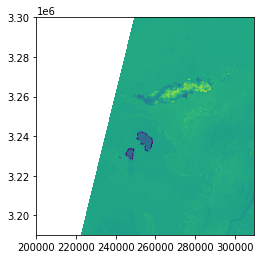

<AxesSubplot:>

In [1]:
import rasterio
from rasterio.plot import show
fp = r'ndvi.tif'
img = rasterio.open(fp)
show(img)

In [2]:
%%bash
echo "Do some cleanup"
rm ndvi.tif
rm *json


Do some cleanup
